## Instalación

Scikit-learn requiere:

    Python (>= 2.6 or >= 3.3),
    NumPy (>= 1.6.1),
    SciPy (>= 0.9).

Una vez instalados los paquetes se puede instalar con

pip install -U scikit-learn

o conda:

conda install scikit-learn 
Aunque es uno de los paquetes por defecto de Anaconda.



http://scikit-learn.org/stable/install.html

## Cheat Sheet

In [2]:
from IPython.display import IFrame
IFrame("./Scikit_Learn_Cheat_Sheet_Python.pdf", width=800, height=600)

## Cargar datos

A parte de los propios datos que incluye de ejemplo permite cargar cualquier tipo de array de numpy, matrices de scipy o dataframes de Pandas.

Un dataset en sklearn es lo siguiente:
- data
- target
- feature_names
- target_names

In [3]:
from sklearn import datasets

# The digits dataset
iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.feature_names)
print(iris.target_names)


[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
[0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Como es más fácil trabajar con atributos (quitarlos, ponerlos etc) vamos a usar pandas.

In [4]:
import pandas as pd
df=pd.read_csv('iris.csv', sep=',',header=None)
df.values[:10]


array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa']], dtype=object)

In [5]:
# lo más fácil es generar csv sin cabecera y luego añadirsela, así les podemos concatenar etc más fácilmente


df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)',"Class"]

In [6]:
train_data = df.drop(["Class"], axis=1)
train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# solo queremos los datos
train_data = train_data.values

In [8]:
target_data = df["Class"].values


In [9]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)

In [10]:
# entrena

forest = forest.fit(train_data, target_data)

In [11]:
# hace la predicción

prediccion = forest.predict([[4.4, 2.9, 1.4, 0.2]])
prediccion

array(['Iris-setosa'], dtype=object)

## Más cosas importantes

- Evaluar el clasificador: Para saber que hemos elegido el mejor clasificador o los mejores parámetros de este
- Serializar y deserializar: Para entrenar el clasificador una vez y usarlo siempre
- Conectar las aplicaciones: Se cargaría el clasificador y se esperarian ejemplos (sockets o alternativas)

### Evaluar

In [12]:
from sklearn.cross_validation import cross_val_score
print(cross_val_score(forest, train_data, target_data, cv=5))


[ 0.96666667  0.96666667  0.93333333  0.93333333  1.        ]


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100)

accuracyForest = cross_val_score(forest, train_data, target_data, cv=5)
accuracyGBC = cross_val_score(gbc, train_data, target_data, cv=5)

In [14]:
%matplotlib inline

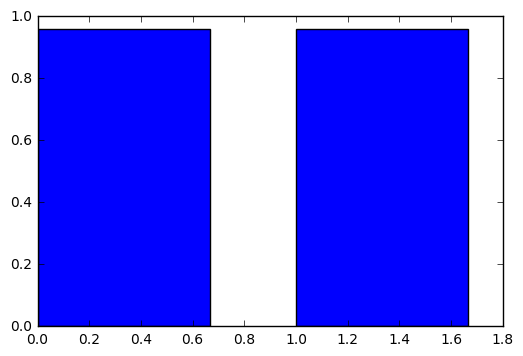

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y = [accuracyForest.mean(), accuracyGBC.mean()]

N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")

plt.show()

### Serializar

In [16]:
import pickle # serializar y deserializar

forestDefinitivo = forest.fit(train_data, target_data)

filename = 'randomForest.sav'
pickle.dump(forestDefinitivo, open(filename, 'wb'))

# el resto de veces 



In [17]:
%%time
# cuando arranca la aplicación se carga
loaded_model = pickle.load(open(filename, 'rb'))

CPU times: user 8.69 ms, sys: 34 µs, total: 8.72 ms
Wall time: 7.84 ms


In [18]:
%%time

# espera a que lleguen ejemplos
result = loaded_model.predict([[4.4, 2.9, 1.4, 0.2]])
print(result)

['Iris-setosa']
CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 14.5 ms
